In [14]:
import numpy as np
import torch 
from d2l import torch as d2l
import math
import matplotlib.pyplot as plt

In [7]:
def train_2d(trainer, steps=20, f_grad=None):
    x1, x2, s1, s2 = -5, 2, 0, 0
    
    results = [(x1, x2)]
    
    for i in range(steps):
        if (f_grad):
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {steps}, (x1, x2): ({x1}, {x2})')
    return results

def show_trace_2d(f, results):
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 3.0, 0.1), torch.arange(-3.0, 3.0, 0.1))
    plt.contour(x1, x2, f(x1, x2))
    plt.grid(linestyle='-', linewidth=1)
    plt.xlabel('x1')
    plt.ylabel('x2')

epoch 50, (x1, x2): (-7.136238463529802e-05, 1.6165625549295253e-11)


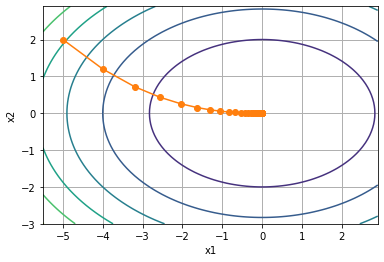

In [11]:
def f_2d(x1, x2):
    return x1**2 + 2 * x2**2

def f_2d_grad(x1, x2):
    return (2*x1, 4*x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta*lr()*g1, x2 - eta*lr()*g2, 0, 0)

def constant_lr():
    return 1
lr = constant_lr
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, steps=50, f_grad=f_2d_grad))

## Add noise to gradient

epoch 50, (x1, x2): (tensor([-0.2009]), tensor([-0.0643]))


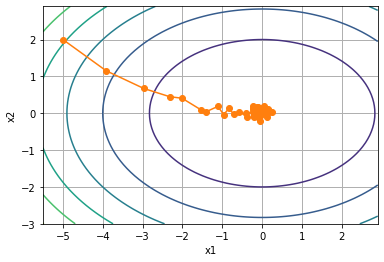

In [12]:
def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    g1 += torch.normal(0.0, 1, (1, ))
    g2 += torch.normal(0.0, 1, (1, ))
    
    return (x1 - eta*lr()*g1, x2 - eta*lr()*g2, 0, 0)

lr = constant_lr
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, steps=50, f_grad=f_2d_grad))

## Dynamic learing rate

epoch 50, (x1, x2): (tensor([-1.9833]), tensor([0.3483]))


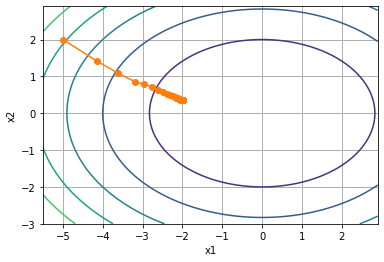

In [16]:
def exponential_lr(): # too aggressive
    global t
    t += 1
    return math.exp(-0.1*t)

t = 1
lr = exponential_lr
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, steps=50, f_grad=f_2d_grad))

epoch 50, (x1, x2): (tensor([0.0350]), tensor([0.0523]))


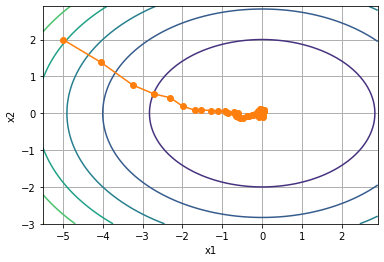

In [18]:
def polynomial_lr(): # smoother
    global t
    t += 1
    return (0.1*t + 1)**(-0.5)

t = 1
lr = polynomial_lr
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, steps=50, f_grad=f_2d_grad))